<a href="https://colab.research.google.com/github/AbelJames26/Project_Mining/blob/main/Final_draft_copy201122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Tensor flow packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.9.2


Keras Tuner libaries

In [2]:
!pip install keras-tuner -q
import keras_tuner


     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 54.7 MB/s 


**Import Data Set**

In [3]:
Path = "/content/Data.csv"
df = pd.read_csv(Path)
df.shape

(904, 14)

Visualize dataset

In [4]:
#Displaying the data
df.head()

,COMMODITY,LATITUDE,LONGITUDE,SITE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,DATE,PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE
0,Gold,-20.771948,122.201825,Anketell Shelf,108.1,0.711064,76866.00,23.0,0.44,76866.00,1/10/2022,1662.4,38235.2,1
1,Gold,-21.727803,122.640676,Anketell Shelf,92.0,0.235652,216.80,25.0,0.44,326.80,8/10/2022,1700.5,42512.5,1
2,Gold,-21.727803,122.640676,Anketell Shelf,92.0,1.857609,170900.00,25.0,3.00,245900.00,8/10/2022,1700.5,42512.5,1
3,Gold,-20.771948,122.201825,Anketell Shelf,108.1,0.147234,159.16,21.0,0.44,159.16,9/10/2022,1700.5,35710.5,1
4,Gold,-20.771948,122.201825,Anketell Shelf,108.1,0.538936,58259.00,25.0,3.00,58259.00,22/10/2022,1651.0,41275.0,1


Data Summary 


In [5]:
df.describe()

,LATITUDE,LONGITUDE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE
count,904.000000,904.000000,904.000000,904.000000,9.040000e+02,904.000000,904.000000,9.040000e+02,904.000000,9.040000e+02,904.000000
mean,-26.266883,119.895145,623.410080,9.772049,3.440268e+04,136.540969,9.024343,3.953207e+04,1670.095907,2.292743e+05,1.855088
std,4.154685,2.397979,2894.526204,17.492069,2.141300e+05,425.121977,17.415920,2.234259e+05,51.218238,7.159566e+05,0.690079
min,-34.542796,115.517246,0.004000,0.000374,2.126000e-03,0.014000,0.004000,2.126000e-03,1369.800000,2.298380e+01,1.000000
25%,-30.044223,117.871707,2.772900,0.688897,1.650150e+01,3.000000,1.135632,1.765513e+01,1651.000000,5.134200e+03,1.000000
50%,-26.866885,119.878010,20.625500,2.095051,3.481505e+02,10.233600,1.946958,3.656695e+02,1670.000000,1.683587e+04,2.000000
75%,-22.590917,121.576609,193.000000,7.116070,3.841250e+03,109.574250,5.927500,4.275548e+03,1700.500000,1.863310e+05,2.000000
max,-16.094355,128.939310,28720.000000,69.900000,4.987181e+06,4380.000000,68.000000,4.987181e+06,1721.100000,7.538418e+06,3.000000


Visualize Ore reserve locations 

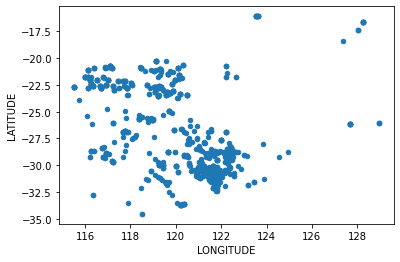

In [6]:
df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE")

**Check for Missing Data**

In [7]:
# Checking the null values

df.isna().any()

COMMODITY                 False
LATITUDE                  False
LONGITUDE                 False
SITE                      False
RES_QTY_MILLION_TONNES    False
RES_QTY_GRAM_TONNE        False
RES_CON_KILOGRAM          False
RV_QTY_million_tonnes     False
RV_QTY_G_GRAM_TONNE       False
POINT_SIZE_KILOGRAM       False
DATE                      False
PRICE_USD                 False
MINERAL_LAND_VALUE_USD    False
COMM_CODE                 False
dtype: bool

Count the number of Null Values in Each Column

In [8]:
# Count number of null values in each columns

df.isna().sum()

COMMODITY                 0
LATITUDE                  0
LONGITUDE                 0
SITE                      0
RES_QTY_MILLION_TONNES    0
RES_QTY_GRAM_TONNE        0
RES_CON_KILOGRAM          0
RV_QTY_million_tonnes     0
RV_QTY_G_GRAM_TONNE       0
POINT_SIZE_KILOGRAM       0
DATE                      0
PRICE_USD                 0
MINERAL_LAND_VALUE_USD    0
COMM_CODE                 0
dtype: int64

Drop NA Values if count is less than 5%

In [9]:
# We can drop the null value as their count is less than 5%

df.dropna(inplace=True)

**Shuffle data**

In [10]:
df = df.sample(n=len(df),random_state =1)
df

,COMMODITY,LATITUDE,LONGITUDE,SITE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,DATE,PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE
874,Nickel,-26.107107,127.696907,Musgrave Province,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,30/10/2022,1641.8,4.153754e+05,3
884,Nickel,-26.039626,128.939310,Warakurna Large Igneous Province,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,30/10/2022,1641.8,2.765159e+05,3
878,Nickel,-26.107107,127.696907,Musgrave Province,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,30/10/2022,1641.8,4.153754e+05,3
784,Nickel,-29.173211,122.253947,Eastern Goldfields Superterrane,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,18/10/2022,1649.0,1.235101e+04,3
525,Iron,-21.766987,116.777930,Hamersley Basin,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,9/10/2022,1700.5,2.200447e+06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Iron,-30.044223,120.007463,Youanmi Terrane,1445.760000,29.301637,423.631350,236.600000,28.193153,490.336350,13/10/2022,1670.0,3.951220e+05,2
767,Nickel,-29.053396,122.151539,Eastern Goldfields Superterrane,10.500000,0.988000,103.740000,6.900000,1.537423,103.740000,9/10/2022,1700.5,1.173345e+04,3
72,Gold,-29.153011,121.675721,Eastern Goldfields Superterrane,76.230000,0.597740,45565.700000,30.000000,1.798119,45565.700000,8/10/2022,1700.5,5.101500e+04,1
235,Gold,-30.566178,121.112010,Yilgarn Craton,0.330000,1.054545,348.000000,30.700000,6.133579,348.000000,8/10/2022,1700.5,5.220535e+04,1


**Convert Categorical variable to numeric. For Gold, Iron Nickel. Into three columns. 1 if it is that commodity or 0 if it isn't**

In [11]:
df1 = pd.get_dummies(df['COMMODITY'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
df = pd.concat([df, df1], axis=1).reindex(df.index)
 
# removing the column 'Purchased' from df
# as it is of no use now.
df.drop('COMMODITY', axis=1, inplace=True)
 
# printing df
df

,LATITUDE,LONGITUDE,SITE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,DATE,PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE,Gold,Iron,Nickel
874,-26.107107,127.696907,Musgrave Province,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,30/10/2022,1641.8,4.153754e+05,3,0,0,1
884,-26.039626,128.939310,Warakurna Large Igneous Province,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,30/10/2022,1641.8,2.765159e+05,3,0,0,1
878,-26.107107,127.696907,Musgrave Province,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,30/10/2022,1641.8,4.153754e+05,3,0,0,1
784,-29.173211,122.253947,Eastern Goldfields Superterrane,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,18/10/2022,1649.0,1.235101e+04,3,0,0,1
525,-21.766987,116.777930,Hamersley Basin,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,9/10/2022,1700.5,2.200447e+06,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-30.044223,120.007463,Youanmi Terrane,1445.760000,29.301637,423.631350,236.600000,28.193153,490.336350,13/10/2022,1670.0,3.951220e+05,2,0,1,0
767,-29.053396,122.151539,Eastern Goldfields Superterrane,10.500000,0.988000,103.740000,6.900000,1.537423,103.740000,9/10/2022,1700.5,1.173345e+04,3,0,0,1
72,-29.153011,121.675721,Eastern Goldfields Superterrane,76.230000,0.597740,45565.700000,30.000000,1.798119,45565.700000,8/10/2022,1700.5,5.101500e+04,1,1,0,0
235,-30.566178,121.112010,Yilgarn Craton,0.330000,1.054545,348.000000,30.700000,6.133579,348.000000,8/10/2022,1700.5,5.220535e+04,1,1,0,0


**Remove variables not used for prediction**

In [12]:
df.drop('SITE', axis=1, inplace=True) 
df.drop('DATE', axis=1, inplace=True) 
df.drop('COMM_CODE', axis=1, inplace=True) 

In [ ]:
df

,LATITUDE,LONGITUDE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,GOLD_PRICE_USD,MINERAL_LAND_VALUE_USD,Gold,Iron,Nickel
874,-26.107107,127.696907,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,1641.8,4.153754e+05,0,0,1
884,-26.039626,128.939310,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,1641.8,2.765159e+05,0,0,1
878,-26.107107,127.696907,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,1641.8,4.153754e+05,0,0,1
784,-29.173211,122.253947,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,1649.0,1.235101e+04,0,0,1
525,-21.766987,116.777930,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,1700.5,2.200447e+06,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-30.044223,120.007463,1445.760000,29.301637,423.631350,236.600000,28.193153,490.336350,1670.0,3.951220e+05,0,1,0
767,-29.053396,122.151539,10.500000,0.988000,103.740000,6.900000,1.537423,103.740000,1700.5,1.173345e+04,0,0,1
72,-29.153011,121.675721,76.230000,0.597740,45565.700000,30.000000,1.798119,45565.700000,1700.5,5.101500e+04,1,0,0
235,-30.566178,121.112010,0.330000,1.054545,348.000000,30.700000,6.133579,348.000000,1700.5,5.220535e+04,1,0,0


In [13]:
df = df[['LATITUDE',	'LONGITUDE',	'RES_QTY_MILLION_TONNES',	'RES_QTY_GRAM_TONNE',	'RES_CON_KILOGRAM',
         'RV_QTY_million_tonnes',	'RV_QTY_G_GRAM_TONNE',	'POINT_SIZE_KILOGRAM',
         'PRICE_USD','Gold','Iron','Nickel','MINERAL_LAND_VALUE_USD']]

df

,LATITUDE,LONGITUDE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,PRICE_USD,Gold,Iron,Nickel,MINERAL_LAND_VALUE_USD
874,-26.107107,127.696907,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,1641.8,0,0,1,4.153754e+05
884,-26.039626,128.939310,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,1641.8,0,0,1,2.765159e+05
878,-26.107107,127.696907,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,1641.8,0,0,1,4.153754e+05
784,-29.173211,122.253947,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,1649.0,0,0,1,1.235101e+04
525,-21.766987,116.777930,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,1700.5,0,1,0,2.200447e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-30.044223,120.007463,1445.760000,29.301637,423.631350,236.600000,28.193153,490.336350,1670.0,0,1,0,3.951220e+05
767,-29.053396,122.151539,10.500000,0.988000,103.740000,6.900000,1.537423,103.740000,1700.5,0,0,1,1.173345e+04
72,-29.153011,121.675721,76.230000,0.597740,45565.700000,30.000000,1.798119,45565.700000,1700.5,1,0,0,5.101500e+04
235,-30.566178,121.112010,0.330000,1.054545,348.000000,30.700000,6.133579,348.000000,1700.5,1,0,0,5.220535e+04


Create Train, Test and Validation sets

In [14]:
X = df.drop(columns='MINERAL_LAND_VALUE_USD')
X.head() # Creating Features for input

,LATITUDE,LONGITUDE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,PRICE_USD,Gold,Iron,Nickel
874,-26.107107,127.696907,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,1641.8,0,0,1
884,-26.039626,128.939310,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,1641.8,0,0,1
878,-26.107107,127.696907,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,1641.8,0,0,1
784,-29.173211,122.253947,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,1649.0,0,0,1
525,-21.766987,116.777930,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,1700.5,0,1,0


In [15]:
Y = df[['MINERAL_LAND_VALUE_USD']] # This is our predicting feature 
Y.head()

,MINERAL_LAND_VALUE_USD
874,4.153754e+05
884,2.765159e+05
878,4.153754e+05
784,1.235101e+04
525,2.200447e+06


In [16]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))


X_train shape: (542, 12)
y_train shape: (542, 1)
X_test shape: (181, 12)
y_test shape: (181, 1)
X_val shape: (181, 12)
y val shape: (181, 1)


**Data Standardization by using StandardScaler function**

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df.iloc[:, :9])

def preprocessor(X):
  A = np.copy(X)
  A[:, :9] = scaler.transform(A[:, :9])
  return A


X_train, X_val,X_test = preprocessor(X_train), preprocessor(X_val),preprocessor(X_test)






/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [18]:
X_train.shape,X_test.shape,X_val.shape

((542, 12), (181, 12), (181, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c8bc51790>,
      dtype=object)

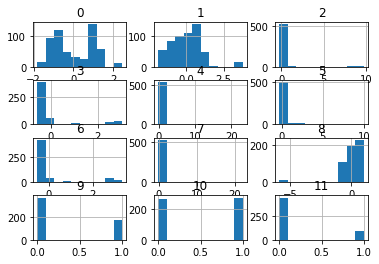

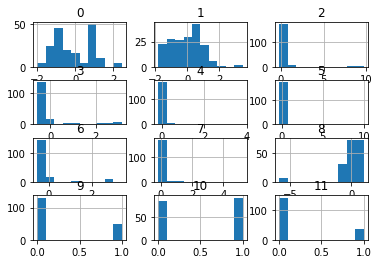

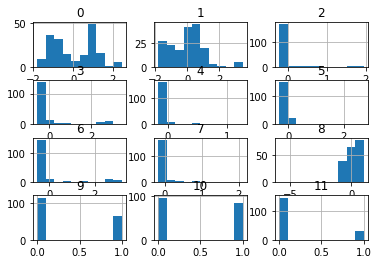

In [19]:
pd.DataFrame(X_train).hist()
pd.DataFrame(X_test).hist()
pd.DataFrame(X_val).hist()

**Multi Linear Regresssion** 


In [46]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, y_train)                                                   # Trying to observe the training and validation error for linear regresssion  
mse(lm.predict(X_train), (y_train), squared = False),mse(lm.predict(X_val), (y_val), squared = False)


 # By observing the results, there is chances we are slightly underfitting as the training loss is lower than validation loss

(10194.391301836056, 6128.63394246127)

Gradient boosting model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators= 52).fit(X_train, y_train)  # Noted that arond 50 is when train and val loss are similar and low. So less signs of over/underfitting. Leave at 52. Best so far
mse(gbr.predict(X_train), (y_train), squared = False) ,mse(gbr.predict(X_val), (y_val), squared = False)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(5352.316927620679, 6119.357213054674)

DNN libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

Simple Neural Network

In [47]:
from sklearn.utils import optimize
simple_nn = Sequential()
simple_nn.add(InputLayer((12,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate = 0.10)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer = opt, loss = 'mse', metrics = [RootMeanSquaredError()])

simple_nn.fit(x = X_train, y=y_train, validation_data = (X_val, y_val), callbacks=[cp], epochs = 100)

Epoch 1/100
17/17 [==============================] - 2s 62ms/step - loss: 693272903680.0000 - root_mean_squared_error: 832630.1250 - val_loss: 96301342720.0000 - val_root_mean_squared_error: 310324.5625
Epoch 2/100
17/17 [==============================] - 1s 36ms/step - loss: 693271986176.0000 - root_mean_squared_error: 832629.5625 - val_loss: 96300965888.0000 - val_root_mean_squared_error: 310323.9688
Epoch 3/100
17/17 [==============================] - 1s 32ms/step - loss: 693271068672.0000 - root_mean_squared_error: 832629.0000 - val_loss: 96300515328.0000 - val_root_mean_squared_error: 310323.2500
Epoch 4/100
17/17 [==============================] - 1s 36ms/step - loss: 693270085632.0000 - root_mean_squared_error: 832628.4375 - val_loss: 96299417600.0000 - val_root_mean_squared_error: 310321.4688
Epoch 5/100
17/17 [==============================] - 1s 34ms/step - loss: 693266481152.0000 - root_mean_squared_error: 832626.2500 - val_loss: 96294289408.0000 - val_root_mean_squared_erro

Evaluate Simple model

In [48]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared = False), mse(simple_nn.predict(X_val),y_val,squared = False)

6/6 [==============================] - 0s 2ms/step


(672531.3793089942, 256859.90248750735)

Large Neural Network

In [49]:
from sklearn.utils import optimize
large_nn = Sequential()
large_nn.add(InputLayer((12,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate = 0.10)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer = opt, loss = 'mse', metrics = [RootMeanSquaredError()])

large_nn.fit(x = X_train, y=y_train, validation_data = (X_val, y_val), callbacks=[cp], epochs = 100)





Epoch 1/100
17/17 [==============================] - 2s 75ms/step - loss: 336703750144.0000 - root_mean_squared_error: 580261.8125 - val_loss: 64964038656.0000 - val_root_mean_squared_error: 254880.4375
Epoch 2/100
17/17 [==============================] - 2s 142ms/step - loss: 116866883584.0000 - root_mean_squared_error: 341858.0000 - val_loss: 17095211008.0000 - val_root_mean_squared_error: 130748.6562
Epoch 3/100
17/17 [==============================] - 0s 13ms/step - loss: 237811662848.0000 - root_mean_squared_error: 487659.3750 - val_loss: 79057166336.0000 - val_root_mean_squared_error: 281171.0625
Epoch 4/100
17/17 [==============================] - 0s 13ms/step - loss: 669533339648.0000 - root_mean_squared_error: 818250.1875 - val_loss: 93778927616.0000 - val_root_mean_squared_error: 306233.4375
Epoch 5/100
17/17 [==============================] - 0s 14ms/step - loss: 354753544192.0000 - root_mean_squared_error: 595611.9375 - val_loss: 39113715712.0000 - val_root_mean_squared_err

Large DNN evaluation 

In [50]:
from tensorflow.keras.models import load_model
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared = False), mse(large_nn.predict(X_val),y_val,squared = False)

6/6 [==============================] - 0s 2ms/step


(11661.15953997555, 12519.59035240058)

**Tune DNN model to give best result**

The hyperamters are the following: 

1. How many number of hidden layers should we have? 
2. How many number of neurons we should have in each hidden layer? 
3. What should the learning rate be from optimizer Adam

In [ ]:
# Import tuning function

from kerastuner.tuners import RandomSearch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
opt = tf.keras.optimizers.RMSprop()

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 3, 5)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=448, step=32),
                activation="relu"))
            
        
    
    model.add(layers.Dense(1, activation="linear"))
    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', [15e-2,1e-1,075e-3])),
                  loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])
    return model
build_model(keras_tuner.HyperParameters())



In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective='val_mean_absolute_error',
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="Test5",
    project_name="Test5",
)

In [ ]:
tuner.search(X_train, y_train, epochs=150, validation_data=(X_val, y_val))

Trial 3 Complete [00h 01m 03s]
val_mean_absolute_error: 5853.88525390625

Best val_mean_absolute_error So Far: 5154.421875
Total elapsed time: 00h 03m 33s


**The best score so far is 5154 for error rate. Compared to all other models. Tuned model is the best**

In [ ]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(1,12))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (1, 12)                   0         
                                                                 
 dense (Dense)               (1, 384)                  4992      
                                                                 
 dense_1 (Dense)             (1, 192)                  73920     
                                                                 
 dense_2 (Dense)             (1, 352)                  67936     
                                                                 
 dense_3 (Dense)             (1, 1)                    353       
                                                                 
Total params: 147,201
Trainable params: 147,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner.results_summary()

Results summary
Results in Test5/Test5
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 3
units_0: 384
units_1: 192
units_2: 352
learning_rate: 0.15
units_3: 256
Score: 5154.421875
Trial summary
Hyperparameters:
num_layers: 4
units_0: 352
units_1: 416
units_2: 352
learning_rate: 0.15
units_3: 32
Score: 5566.263427734375
Trial summary
Hyperparameters:
num_layers: 4
units_0: 416
units_1: 256
units_2: 352
learning_rate: 0.15
units_3: 96
Score: 5853.88525390625


**Tuned Model**

In [ ]:
from sklearn.utils import optimize
tuned_nn = Sequential()
tuned_nn.add(InputLayer((12,)))
tuned_nn.add(Dense(384, 'relu'))
tuned_nn.add(Dense(192, 'relu'))
tuned_nn.add(Dense(352, 'relu'))
tuned_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate = 0.15)
cp = ModelCheckpoint('models/tuned_nn', save_best_only=True)
tuned_nn.compile(optimizer = opt, loss = 'mse', metrics = [RootMeanSquaredError()])

tuned_nn.fit(x = X_train, y=y_train, validation_data = (X_val, y_val), callbacks=[cp], epochs = 100)


Epoch 1/100
17/17 [==============================] - 3s 145ms/step - loss: 517800361984.0000 - root_mean_squared_error: 719583.4375 - val_loss: 41963249664.0000 - val_root_mean_squared_error: 204849.3281
Epoch 2/100
17/17 [==============================] - 1s 49ms/step - loss: 261390106624.0000 - root_mean_squared_error: 511263.2500 - val_loss: 15254724608.0000 - val_root_mean_squared_error: 123510.0156
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 473433997312.0000 - root_mean_squared_error: 688065.3750 - val_loss: 56949690368.0000 - val_root_mean_squared_error: 238641.3438
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 194836938752.0000 - root_mean_squared_error: 441403.3750 - val_loss: 58450804736.0000 - val_root_mean_squared_error: 241766.0156
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 140767002624.0000 - root_mean_squared_error: 375189.2812 - val_loss: 25279496192.0000 - val_root_mean_squared_error:

Evaluate Tuned Model

In [ ]:
from tensorflow.keras.models import load_model
tuned_nn = load_model('models/tuned_nn')
mse(tuned_nn.predict(X_train), y_train, squared = False), mse(tuned_nn.predict(X_val),y_val,squared = False)

6/6 [==============================] - 0s 3ms/step


(22530.353921219692, 13340.024408102967)

Much better error loss after tuning. Now try on test set 

In [ ]:
from tensorflow.keras.models import load_model
tuned_nn = load_model('models/tuned_nn')
mse(tuned_nn.predict(X_test), y_test, squared = False)

6/6 [==============================] - 0s 3ms/step


27554.138584465327

**Predict DNN tuned model on  test dataset**

In [ ]:
model = tuned_nn
predict_on_untrained = model.predict(X_test)
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs = 100)

6/6 [==============================] - 0s 3ms/step
Epoch 1/100
17/17 [==============================] - 1s 15ms/step - loss: 107141439488.0000 - root_mean_squared_error: 327324.6562 - val_loss: 59246448640.0000 - val_root_mean_squared_error: 243405.9375
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 34681729024.0000 - root_mean_squared_error: 186230.3125 - val_loss: 9885621248.0000 - val_root_mean_squared_error: 99426.4609
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 27861737472.0000 - root_mean_squared_error: 166918.3594 - val_loss: 14405682176.0000 - val_root_mean_squared_error: 120023.6719
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 44087779328.0000 - root_mean_squared_error: 209970.9062 - val_loss: 44043313152.0000 - val_root_mean_squared_error: 209864.9844
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 65282625536.0000 - root_mean_squared_error: 255504.6562 - val_loss: 8699

**Predictions**

In [ ]:
Preds_on_trained = model.predict(X_test)
Preds_on_trained.shape
Preds_on_trained
   

6/6 [==============================] - 0s 3ms/step


array([[  23246.037],
       [ 156688.3  ],
       [  14007.241],
       [  77430.47 ],
       [  14007.241],
       [  14007.241],
       [ 167844.69 ],
       [  14007.241],
       [  14007.241],
       [  14007.241],
       [ 622479.2  ],
       [ 435843.9  ],
       [ 424632.9  ],
       [ 238003.53 ],
       [  17878.783],
       [  21093.35 ],
       [ 222883.6  ],
       [ 611027.3  ],
       [  14007.241],
       [  14007.241],
       [  30439.549],
       [  23329.63 ],
       [ 303915.53 ],
       [ 639312.5  ],
       [ 187810.02 ],
       [ 243104.64 ],
       [ 256614.77 ],
       [ 331559.62 ],
       [ 101658.22 ],
       [  42002.1  ],
       [ 135964.03 ],
       [ 661569.06 ],
       [  46676.78 ],
       [  14007.241],
       [ 227086.44 ],
       [  14007.241],
       [  14007.241],
       [  14007.241],
       [7674761.5  ],
       [ 225377.97 ],
       [  14007.241],
       [  14007.241],
       [  14007.241],
       [  14007.241],
       [  14007.241],
       [  

Test on orignal dataset values

In [ ]:
test_data = np.array([-26.107107,	127.696907,	389.100000,	0.011643,	45304.000000,	253.000000,	0.012391,	76654.000000,	1641.8,	0,	0,	1]) 

test_data.reshape(1,12)

array([[-2.61071070e+01,  1.27696907e+02,  3.89100000e+02,
         1.16430000e-02,  4.53040000e+04,  2.53000000e+02,
         1.23910000e-02,  7.66540000e+04,  1.64180000e+03,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
 x=model.predict(test_data.reshape(1,12),batch_size=1)
 

1/1 [==============================] - 0s 16ms/step


In [ ]:
print('This is the value predicted mineral land value from input parameters',x,"Million USD dollars")

This is the value predicted mineral land value from input parameters [[14007.24]] Million USD dollars


**Creat User Interface**

This is when the customer enters in the parameters then they receive a predicted mineral price 

In [ ]:
print(' Welcome to our mineral land prediction software!!!','\n','If you would like to make a prediction, please enter the following values')
print('Input Parameters')
a = float(input('LATTITUDE '))
b= float(input('LONGTITUDE '))
c= float(input('RES_QTY_MILLION_TONNES: '))
d = float(input('RES_QTY_GRAM_TONNE: '))
e = float(input('RES_CON_KILOGRAM: '))
f = float(input('RV_QTY_million_tonnes: '))
g = float(input('RV_QTY_AVG_GRAM_TONNE: '))
h = float(input('POINT_SIZE_KILOGRAM: '))
i = float(input('GOLD_PRICE_USD: '))
j = float(input('IF commodity is Gold press 1 else 0 : '))
k = float(input('IF commodity is Iron press 1 else 0: '))
l = float(input('IF commodity is Nickel press 1 else 0 '))
testdata = np.array([a,b,c,d,e,f,g,h,i,j,k,l])

y = model.predict(testdata.reshape(1,12),batch_size=1)

print('This is the value predicted mineral land value from input parameters',y,"Million USD dollars")